In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [3]:
import torch

In [4]:
# create training set of bigrams
# we feed each bigram as an input output pair to the NN.
xs, ys = [], []
for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [5]:
xs

tensor([ 0,  5, 13, 13,  1])

In [6]:
ys

tensor([ 5, 13, 13,  1,  0])

In [7]:
# we will one hot encode these integers (which represent indices of chars)
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [8]:
xenc.shape

torch.Size([5, 27])

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

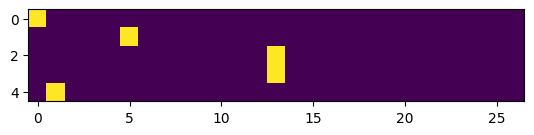

In [10]:
plt.imshow(xenc)

In [11]:
xenc.dtype

torch.float32

In [28]:
W = torch.randn((27,27), requires_grad=True)
xenc @ W

tensor([[-1.1710, -0.9591, -1.9194, -2.6381, -0.6938,  2.6133,  1.0220,  1.1335,
         -0.4362,  0.5572,  0.6272, -0.0836, -0.3761,  0.7213,  0.5915, -0.6616,
         -0.8417, -0.7701,  1.4991,  0.8957, -0.1696, -0.6707, -0.8702,  0.9211,
          0.3527, -2.5752,  0.2264],
        [ 0.1107,  1.8776,  0.0739,  1.1788,  0.9717,  0.5884,  0.1451, -0.2949,
          1.0429,  0.1200, -2.2544, -1.0316, -0.4569,  1.6050,  1.0165,  1.5315,
         -1.0418,  0.6204, -1.7400,  1.0485, -0.4515,  0.2985,  0.5242, -0.6956,
         -1.4719, -0.3318, -0.4830],
        [ 1.4645, -1.4298, -0.4673, -0.9595, -0.2543, -0.0315, -1.0572, -1.6244,
          0.4362, -1.2856, -0.4076,  0.0608, -0.0939, -0.6835, -0.4885, -0.1230,
          0.1918, -1.1328,  1.0115,  1.8218, -0.4205, -0.4035, -2.0002,  1.5929,
          0.8167,  0.5298, -1.9825],
        [ 1.4645, -1.4298, -0.4673, -0.9595, -0.2543, -0.0315, -1.0572, -1.6244,
          0.4362, -1.2856, -0.4076,  0.0608, -0.0939, -0.6835, -0.4885, -0.1230

In [29]:
logits = (xenc @ W) # log counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True)
probs

tensor([[0.0067, 0.0083, 0.0032, 0.0016, 0.0109, 0.2963, 0.0603, 0.0675, 0.0140,
         0.0379, 0.0407, 0.0200, 0.0149, 0.0447, 0.0392, 0.0112, 0.0094, 0.0101,
         0.0972, 0.0532, 0.0183, 0.0111, 0.0091, 0.0546, 0.0309, 0.0017, 0.0272],
        [0.0239, 0.1399, 0.0230, 0.0696, 0.0565, 0.0385, 0.0247, 0.0159, 0.0607,
         0.0241, 0.0022, 0.0076, 0.0136, 0.1065, 0.0591, 0.0990, 0.0076, 0.0398,
         0.0038, 0.0611, 0.0136, 0.0288, 0.0361, 0.0107, 0.0049, 0.0154, 0.0132],
        [0.1226, 0.0068, 0.0178, 0.0109, 0.0220, 0.0275, 0.0099, 0.0056, 0.0439,
         0.0078, 0.0189, 0.0301, 0.0258, 0.0143, 0.0174, 0.0251, 0.0343, 0.0091,
         0.0780, 0.1753, 0.0186, 0.0189, 0.0038, 0.1394, 0.0642, 0.0482, 0.0039],
        [0.1226, 0.0068, 0.0178, 0.0109, 0.0220, 0.0275, 0.0099, 0.0056, 0.0439,
         0.0078, 0.0189, 0.0301, 0.0258, 0.0143, 0.0174, 0.0251, 0.0343, 0.0091,
         0.0780, 0.1753, 0.0186, 0.0189, 0.0038, 0.1394, 0.0642, 0.0482, 0.0039],
        [0.0221, 0.0198,

In [30]:
probs.shape

torch.Size([5, 27])

In [31]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print(f"Bigram {i} - {itos[x]}{itos[y]}")
    print(f"input {x}")
    print(f"expected o/p index {y}, p({y})={probs[i, y]}")
    logp = torch.log(probs[i, y])
    nll = -logp
    nlls[i] = nll
print(nlls.mean().item())

Bigram 0 - .e
input 0
expected o/p index 5, p(5)=0.2962716519832611
Bigram 1 - em
input 5
expected o/p index 13, p(13)=0.10652654618024826
Bigram 2 - mm
input 13
expected o/p index 13, p(13)=0.014313177205622196
Bigram 3 - ma
input 13
expected o/p index 1, p(1)=0.006786306854337454
Bigram 4 - a.
input 1
expected o/p index 0, p(0)=0.022142337635159492
3.301105499267578


In [67]:
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num_examples = xs.nelement()

In [79]:
W = torch.randn((27,27), requires_grad=True)

In [80]:
for k in range(100):
    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float()
    logits = xenc @ W
    counts = logits.exp()
    probs = counts / counts.sum(1, keepdim=True)
    loss = -probs[torch.arange(num_examples), ys].log().mean()
    loss += 0.1*(W**2).mean() # regularization loss
    print(loss)
    
    # backward pass
    W.grad = None
    loss.backward()
    W.data += -10 * W.grad


tensor(3.8735, grad_fn=<AddBackward0>)
tensor(3.7787, grad_fn=<AddBackward0>)
tensor(3.6987, grad_fn=<AddBackward0>)
tensor(3.6290, grad_fn=<AddBackward0>)
tensor(3.5674, grad_fn=<AddBackward0>)
tensor(3.5119, grad_fn=<AddBackward0>)
tensor(3.4615, grad_fn=<AddBackward0>)
tensor(3.4153, grad_fn=<AddBackward0>)
tensor(3.3727, grad_fn=<AddBackward0>)
tensor(3.3332, grad_fn=<AddBackward0>)
tensor(3.2964, grad_fn=<AddBackward0>)
tensor(3.2621, grad_fn=<AddBackward0>)
tensor(3.2301, grad_fn=<AddBackward0>)
tensor(3.2002, grad_fn=<AddBackward0>)
tensor(3.1722, grad_fn=<AddBackward0>)
tensor(3.1460, grad_fn=<AddBackward0>)
tensor(3.1214, grad_fn=<AddBackward0>)
tensor(3.0984, grad_fn=<AddBackward0>)
tensor(3.0768, grad_fn=<AddBackward0>)
tensor(3.0565, grad_fn=<AddBackward0>)
tensor(3.0374, grad_fn=<AddBackward0>)
tensor(3.0194, grad_fn=<AddBackward0>)
tensor(3.0025, grad_fn=<AddBackward0>)
tensor(2.9866, grad_fn=<AddBackward0>)
tensor(2.9716, grad_fn=<AddBackward0>)
tensor(2.9574, grad_fn=<A

In [85]:
for i in range(5):
    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits =  xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdim=True)
        ix = torch.multinomial(p, num_samples=1, replacement=True).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))


lenn.
annka.
seeettin.
amadonden.
a.
